In [1]:
#(1) 데이터 가져오기
#sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

#diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
df_x = diabetes.data
df_y = diabetes.target

In [2]:
#(2) 모델에 입력할 데이터 X 준비하기
#df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
import numpy as np

print(type(df_x))

<class 'numpy.ndarray'>


In [3]:
#(3) 모델에 예측할 데이터 y 준비하기
# #df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.
print(type(df_y))

<class 'numpy.ndarray'>


In [4]:
#(4) train 데이터와 test 데이터로 분리하기
# #X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.2)

In [5]:
#(5) 모델 준비하기
# #입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
# Feature의 갯수가 10개 (w = 10, b = 1)
print(train_x.shape) 
w = np.random.rand(10)
b = np.random.rand(1)

print(w.shape, b.shape)

#모델 함수를 구현해주세요.
def model(x, w, b):
    predictions = 0
    for i in range(10):
        predictions += x[:, i] * w[i]
    predictions += b
    return predictions

(353, 10)
(10,) (1,)


In [6]:
#(6) 손실함수 loss 정의하기
#손실함수를 MSE 함수로 정의해주세요.
# 두 값의 차이의 제곱의 평균
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

In [7]:
#(7) 기울기를 구하는 gradient 함수 구현하기
#기울기를 계산하는 gradient 함수를 구현해주세요.
def gradient(x, w, b, y):
    N = len(x)
    
    pred_y = model(x, w, b)
    
    dw = 1/N * 2 * x.T.dot(pred_y - y) 
    
    db = 2 * (pred_y - y).mean()
    
    return dw, db, pred_y

In [8]:
#(8) 하이퍼 파라미터인 학습률 설정하기
#학습률, learning rate 를 설정해주세요
#만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.
LEARNING_RATE = 0.05 # 변경하며 실험해보기

In [9]:
#(9) 모델 학습하기
#정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
#loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
#입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.
losses = []


for i in range(1, 1001):
    dw, db, pred_y = gradient(train_x, w, b, train_y)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(train_x, w, b, train_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 8684.8429
Iteration 20 : Loss 6159.5864
Iteration 30 : Loss 5821.2092
Iteration 40 : Loss 5749.2080
Iteration 50 : Loss 5710.0991
Iteration 60 : Loss 5675.4891
Iteration 70 : Loss 5641.9170
Iteration 80 : Loss 5608.9534
Iteration 90 : Loss 5576.5372
Iteration 100 : Loss 5544.6526
Iteration 110 : Loss 5513.2892
Iteration 120 : Loss 5482.4376
Iteration 130 : Loss 5452.0884
Iteration 140 : Loss 5422.2328
Iteration 150 : Loss 5392.8618
Iteration 160 : Loss 5363.9666
Iteration 170 : Loss 5335.5388
Iteration 180 : Loss 5307.5700
Iteration 190 : Loss 5280.0519
Iteration 200 : Loss 5252.9764
Iteration 210 : Loss 5226.3357
Iteration 220 : Loss 5200.1218
Iteration 230 : Loss 5174.3273
Iteration 240 : Loss 5148.9445
Iteration 250 : Loss 5123.9662
Iteration 260 : Loss 5099.3850
Iteration 270 : Loss 5075.1940
Iteration 280 : Loss 5051.3861
Iteration 290 : Loss 5027.9545
Iteration 300 : Loss 5004.8925
Iteration 310 : Loss 4982.1936
Iteration 320 : Loss 4959.8512
Iteration 330 : L

In [10]:
losses = []


for i in range(1, 1001):
    dw, db, pred_y = gradient(train_x, w, b, train_y)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(train_x, w, b, train_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4007.1471
Iteration 20 : Loss 3999.0130
Iteration 30 : Loss 3990.9827
Iteration 40 : Loss 3983.0547
Iteration 50 : Loss 3975.2271
Iteration 60 : Loss 3967.4984
Iteration 70 : Loss 3959.8669
Iteration 80 : Loss 3952.3310
Iteration 90 : Loss 3944.8891
Iteration 100 : Loss 3937.5399
Iteration 110 : Loss 3930.2816
Iteration 120 : Loss 3923.1128
Iteration 130 : Loss 3916.0322
Iteration 140 : Loss 3909.0382
Iteration 150 : Loss 3902.1295
Iteration 160 : Loss 3895.3047
Iteration 170 : Loss 3888.5624
Iteration 180 : Loss 3881.9013
Iteration 190 : Loss 3875.3201
Iteration 200 : Loss 3868.8176
Iteration 210 : Loss 3862.3924
Iteration 220 : Loss 3856.0433
Iteration 230 : Loss 3849.7692
Iteration 240 : Loss 3843.5687
Iteration 250 : Loss 3837.4409
Iteration 260 : Loss 3831.3844
Iteration 270 : Loss 3825.3983
Iteration 280 : Loss 3819.4813
Iteration 290 : Loss 3813.6324
Iteration 300 : Loss 3807.8505
Iteration 310 : Loss 3802.1345
Iteration 320 : Loss 3796.4835
Iteration 330 : L

In [11]:
losses = []


for i in range(1, 1001):
    dw, db, pred_y = gradient(train_x, w, b, train_y)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(train_x, w, b, train_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 3519.3439
Iteration 20 : Loss 3516.4910
Iteration 30 : Loss 3513.6616
Iteration 40 : Loss 3510.8553
Iteration 50 : Loss 3508.0718
Iteration 60 : Loss 3505.3109
Iteration 70 : Loss 3502.5723
Iteration 80 : Loss 3499.8557
Iteration 90 : Loss 3497.1609
Iteration 100 : Loss 3494.4875
Iteration 110 : Loss 3491.8354
Iteration 120 : Loss 3489.2041
Iteration 130 : Loss 3486.5936
Iteration 140 : Loss 3484.0035
Iteration 150 : Loss 3481.4335
Iteration 160 : Loss 3478.8836
Iteration 170 : Loss 3476.3533
Iteration 180 : Loss 3473.8425
Iteration 190 : Loss 3471.3509
Iteration 200 : Loss 3468.8783
Iteration 210 : Loss 3466.4245
Iteration 220 : Loss 3463.9892
Iteration 230 : Loss 3461.5723
Iteration 240 : Loss 3459.1736
Iteration 250 : Loss 3456.7927
Iteration 260 : Loss 3454.4295
Iteration 270 : Loss 3452.0839
Iteration 280 : Loss 3449.7555
Iteration 290 : Loss 3447.4442
Iteration 300 : Loss 3445.1499
Iteration 310 : Loss 3442.8722
Iteration 320 : Loss 3440.6111
Iteration 330 : L

In [12]:
losses = []


for i in range(1, 1001):
    dw, db, pred_y = gradient(train_x, w, b, train_y)
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(train_x, w, b, train_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 3316.1008
Iteration 20 : Loss 3314.6588
Iteration 30 : Loss 3313.2250
Iteration 40 : Loss 3311.7994
Iteration 50 : Loss 3310.3819
Iteration 60 : Loss 3308.9725
Iteration 70 : Loss 3307.5712
Iteration 80 : Loss 3306.1777
Iteration 90 : Loss 3304.7922
Iteration 100 : Loss 3303.4145
Iteration 110 : Loss 3302.0445
Iteration 120 : Loss 3300.6822
Iteration 130 : Loss 3299.3275
Iteration 140 : Loss 3297.9804
Iteration 150 : Loss 3296.6408
Iteration 160 : Loss 3295.3087
Iteration 170 : Loss 3293.9840
Iteration 180 : Loss 3292.6666
Iteration 190 : Loss 3291.3565
Iteration 200 : Loss 3290.0536
Iteration 210 : Loss 3288.7579
Iteration 220 : Loss 3287.4693
Iteration 230 : Loss 3286.1877
Iteration 240 : Loss 3284.9132
Iteration 250 : Loss 3283.6456
Iteration 260 : Loss 3282.3850
Iteration 270 : Loss 3281.1312
Iteration 280 : Loss 3279.8841
Iteration 290 : Loss 3278.6439
Iteration 300 : Loss 3277.4103
Iteration 310 : Loss 3276.1834
Iteration 320 : Loss 3274.9631
Iteration 330 : L

In [13]:
#(10) test 데이터에 대한 성능 확인하기
#test 데이터에 대한 성능을 확인해주세요.
#MSE 손실함수값 3000 이하

prediction = model(test_x, w, b)
mse = loss(test_x, w, b, test_y)
mse

2722.3786740547243

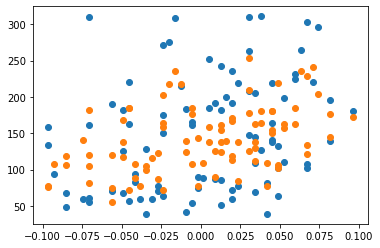

In [15]:
#(11) 정답 데이터와 예측한 데이터 시각화하기
# #x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.
import matplotlib.pyplot as plt

plt.scatter(test_x[:, 0], test_y)
plt.scatter(test_x[:, 0], prediction)
plt.show()